In [15]:
import simpy as sp
from src.fund import Fund
from src.farm import FarmingBusiness
from src.parameters import FarmParameters, FarmPlotParameters, ConversionParameters

In [16]:
def setup_traditional_farm(env, area):
    plot_params = FarmPlotParameters()
    farm_params = FarmParameters(total_floor_m_squared=area)
    conversion_params = ConversionParameters()
    farm = FarmingBusiness(env, Fund(0, 0.03, 12), plot_params, farm_params, conversion_params)
    return farm

In [17]:
def traditional_farm_returns(area):
    env = sp.Environment()
    farm = setup_traditional_farm(env, area)

    env.run(until=365 * 10)

    return farm.fund.equivalent_value_after_years(-10)

In [18]:
def setup_vertical_farm(env, area):
    plot_params = FarmPlotParameters(temp_control_energy_cost=0.1, 
                                     air_control_energy_cost=0.1,
                                     captures_sunlight=False,
                                     captures_rainwater=False,
                                     stackable=True)
    farm_params = FarmParameters(total_floor_m_squared=area, setup_cost_m_squared_usd=1000)
    conversion_params = ConversionParameters()
    farm = FarmingBusiness(env, Fund(0, 0.03, 12), plot_params, farm_params, conversion_params)
    return farm

In [19]:
def vertical_farm_returns(area):
    env = sp.Environment()
    farm = setup_vertical_farm(env, area)

    env.run(until=365 * 10)

    return farm.fund.equivalent_value_after_years(-10)

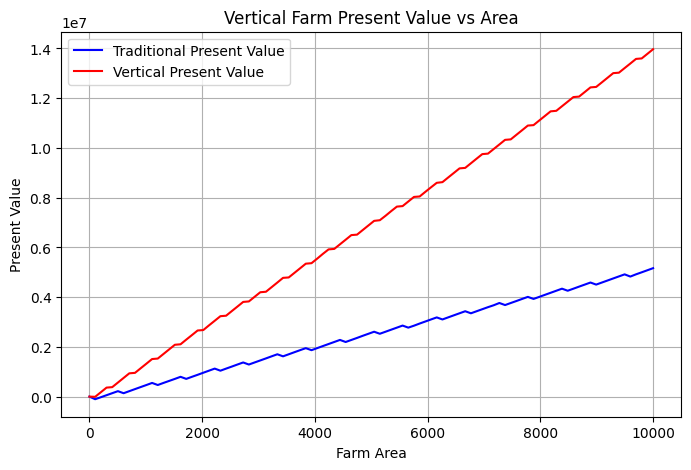

In [20]:
areas = np.linspace(0, 10000, 100)  # Generate area values
returns_vertical = [vertical_farm_returns(area) for area in areas]  # Compute returns

plt.figure(figsize=(8, 5))
plt.plot(areas, returns_traditional, label="Traditional Present Value", color="b")
plt.plot(areas, returns_vertical, label="Vertical Present Value", color="r")
plt.xlabel("Farm Area")
plt.ylabel("Present Value")
plt.title("Vertical Farm Present Value vs Area")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
env = sp.Environment()
plot_params = FarmPlotParameters(temp_control_energy_cost=0.1, 
                                     air_control_energy_cost=0.1,
                                     captures_sunlight=False,
                                     captures_rainwater=False,
                                     stackable=True)
farm_params = FarmParameters(total_floor_m_squared=500, 
                             floor_height=4.5, 
                             setup_cost_m_squared_usd=1000)
conversion_params = ConversionParameters()
farm = FarmingBusiness(env, Fund(0, 0.03, 12), plot_params, farm_params, conversion_params)

env.run(until=365 * 10)

history_vertical = farm.fund_history

In [22]:
env = sp.Environment()
plot_params = FarmPlotParameters()
farm_params = FarmParameters()
conversion_params = ConversionParameters()
farm = FarmingBusiness(env, Fund(0, 0.03, 12), plot_params, farm_params, conversion_params)

env.run(until=365 * 10)

history_traditional = farm.fund_history

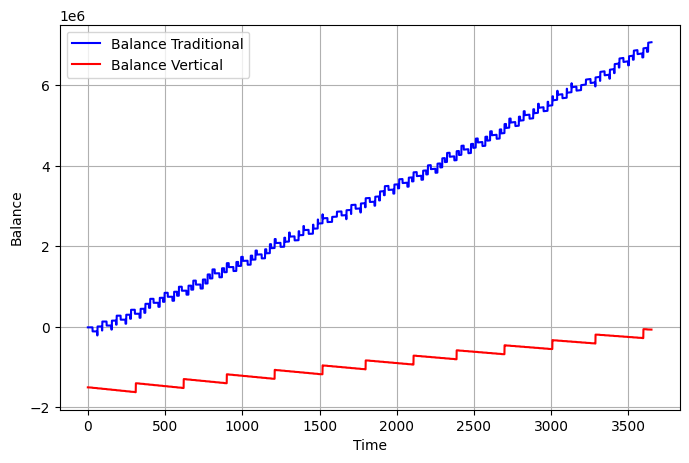

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(history_traditional, label="Balance Traditional", color="b")
plt.plot(history_vertical, label="Balance Vertical", color="r")
plt.xlabel("Time")
plt.ylabel("Balance")
plt.legend()
plt.grid(True)
plt.show()